In [0]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Steps to be followed:
### 1. Load The Dataset

In [158]:
# Read the required data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
129,phon_R01_S32_2,120.078,126.632,105.667,0.00270,0.00002,0.00116,0.00135,0.00349,0.01022,0.090,0.00476,0.00588,0.00903,0.01428,0.00487,26.369,1,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
120,phon_R01_S27_6,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
15,phon_R01_S04_4,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,0.126,0.00772,0.00888,0.01359,0.02316,0.00839,25.175,1,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
20,phon_R01_S05_3,153.848,165.738,65.782,0.00840,0.00005,0.00428,0.00450,0.01285,0.03810,0.328,0.01667,0.02383,0.04055,0.05000,0.03871,17.536,1,0.660125,0.704087,-4.095442,0.262564,2.739710,0.365391
130,phon_R01_S32_3,120.289,128.143,100.209,0.00492,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,0.01610,23.949,1,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923


##Attribute Information:

* Matrix column entries (attributes):
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
* Several measures of variation in amplitude
  * NHR,HNR - Two measures of ratio of noise to tonal components in the voice
  * status - Health status of the subject (one) - Parkinson's, (zero) - healthy
  * RPDE,D2 - Two nonlinear dynamical complexity measures
  * DFA - Signal fractal scaling exponent
  * spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [160]:
df.shape

(195, 24)

In [161]:
df.isna().values.any()

False

In [162]:
df.isnull().values.any()

False

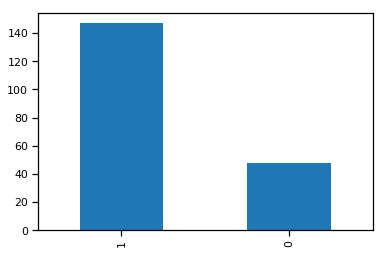

1    147
0     48
Name: status, dtype: int64
('% clients with parkinsons', 75.38461538461539)


In [163]:
#Get the target column distribution.
pd.value_counts(df["status"]).plot(kind="bar")
plt.show()
temp1 = pd.value_counts(df["status"])
print(pd.value_counts(df["status"]))
print("% clients with parkinsons", 100.0*temp1[1]/sum(temp1))

### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [0]:
# Paitient name is not going to help us in analysis, so better drop that column from further operations
df.drop("name", axis=1, inplace=True)

In [165]:
# Check Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


* MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:PPQ, MDVP:RAP, MDVP:shimmer(dB) Mean and 50% values are not similar, seems outlier present
* MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz): It's not normal data by distribution, most of the observations are spread more than 3 standard deviations on each side of the mean.

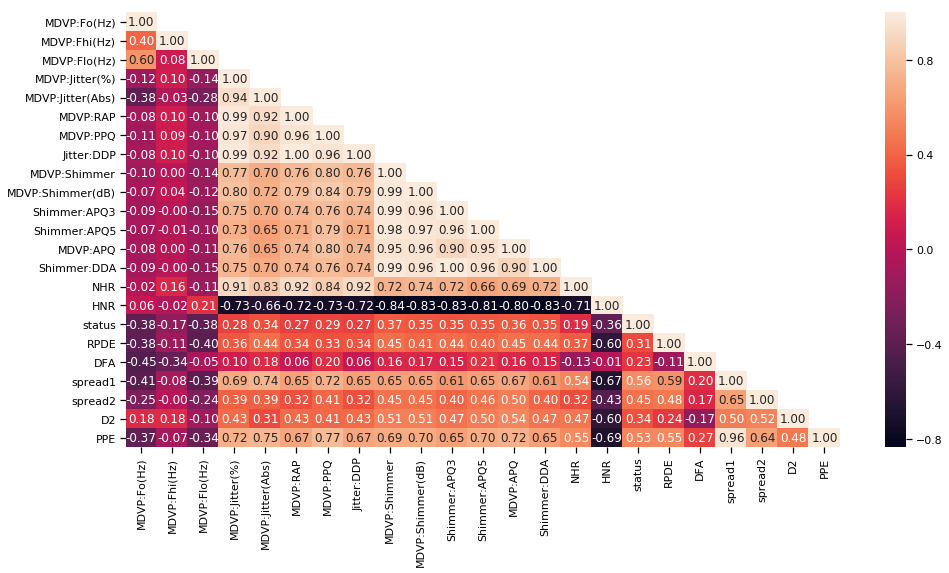

In [166]:
# Correlation with heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2})
plt.figure(figsize=(16,8))

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

* From Above plot we could determine evidend correlation across multiple variables, for Ex. Jitter value in % is very obvously representing the value in Absolute terms, will see if we can drop high correlated features

In [167]:
#Let's find high correlated features [>0.95]
out = (corr.mask(np.eye(len(corr), dtype=bool)).abs() >= 0.95).any()
out
dropCols = []
i = 0
while i < len(out):
    if(out[i]==True):
        dropCols.append(corr.columns[i])        
    i = i +1
print("Below columns can be dropped due to very high correlation:")
dropCols

Below columns can be dropped due to very high correlation:


['MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'spread1',
 'PPE']

In [0]:
# Lets drop comumn with higest correlation
df.drop(dropCols, axis=1, inplace=True)

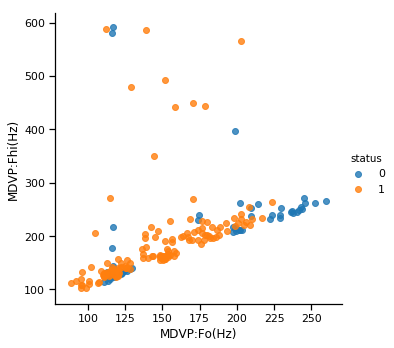

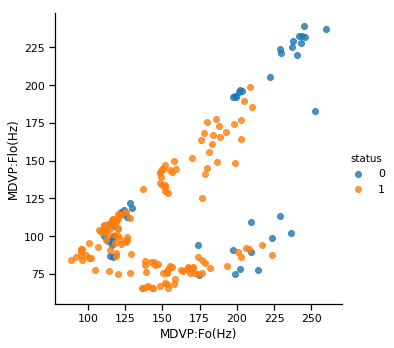

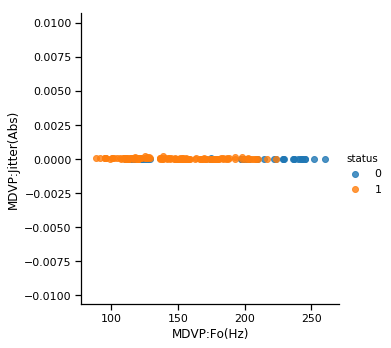

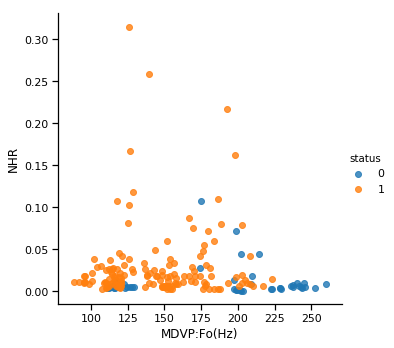

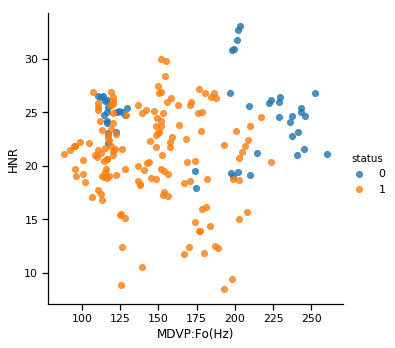

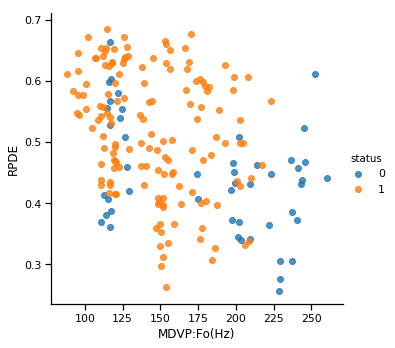

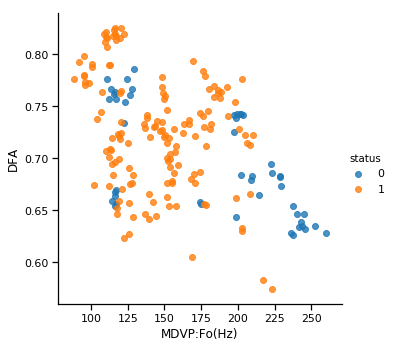

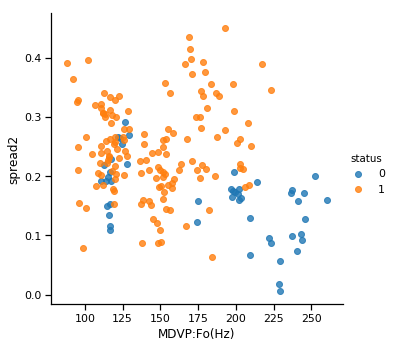

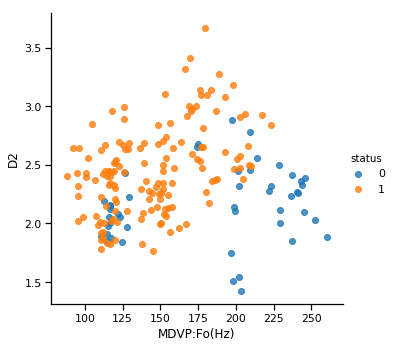

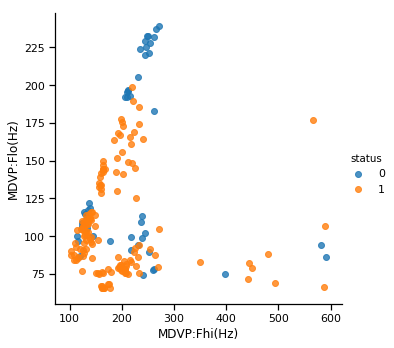

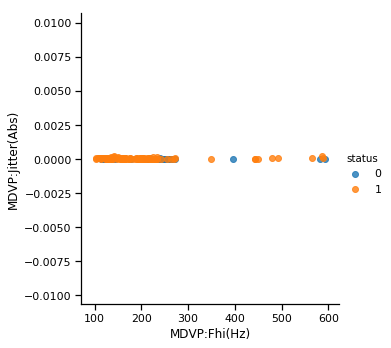

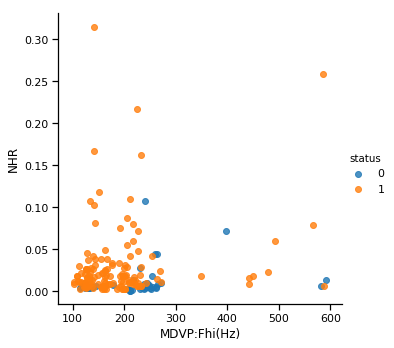

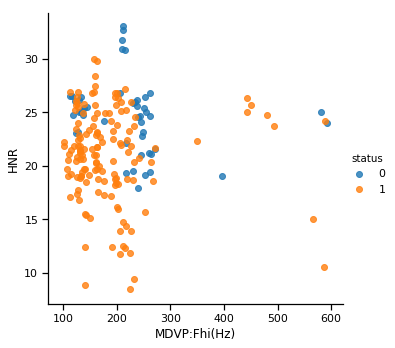

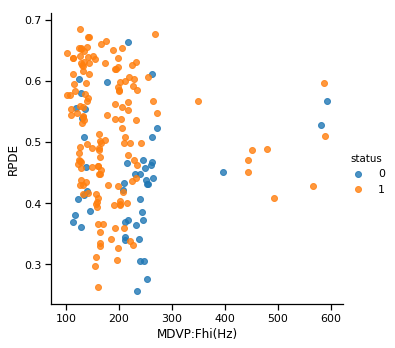

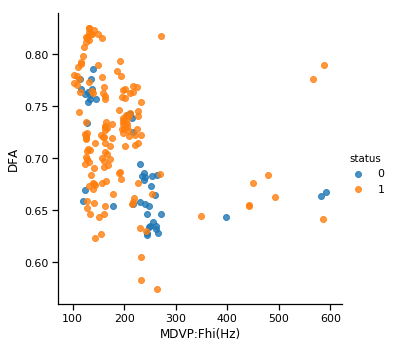

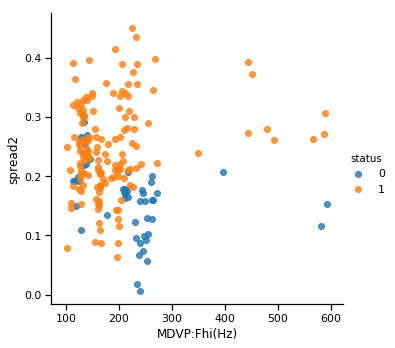

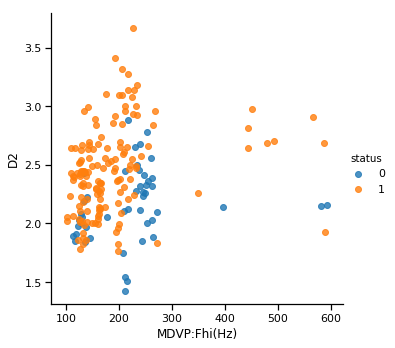

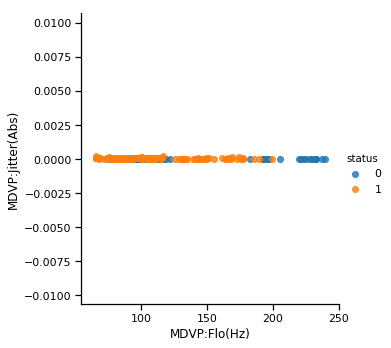

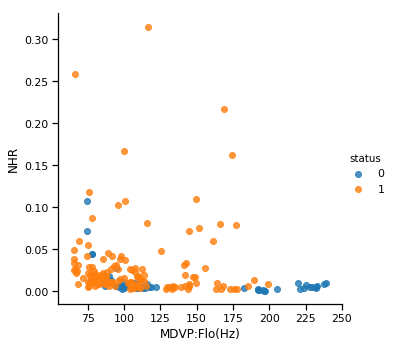

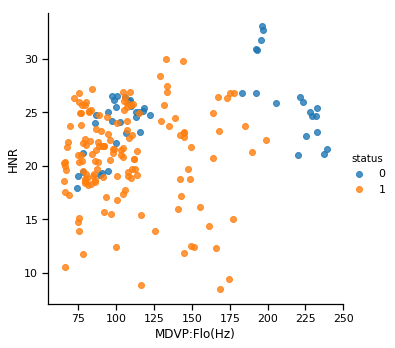

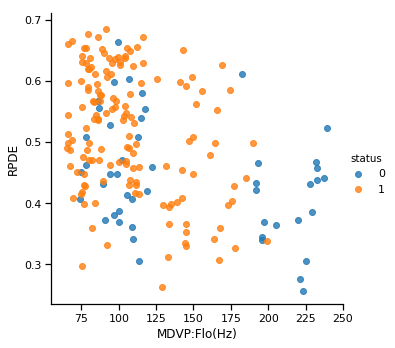

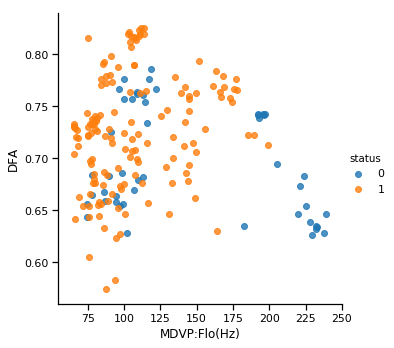

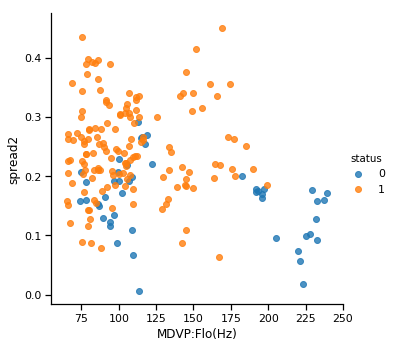

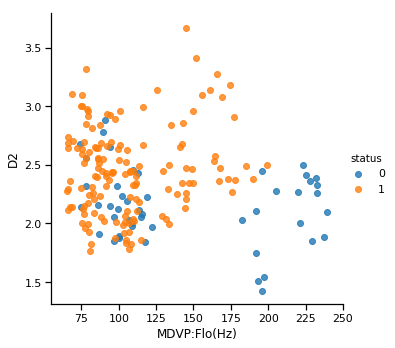

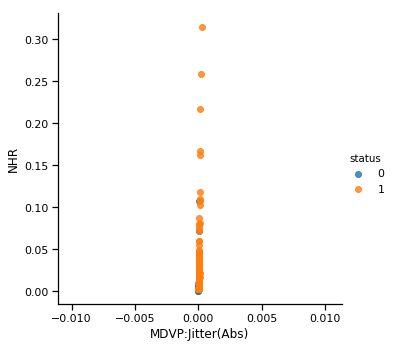

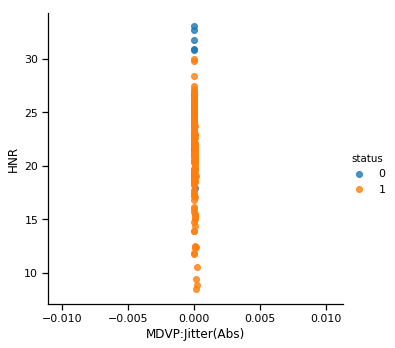

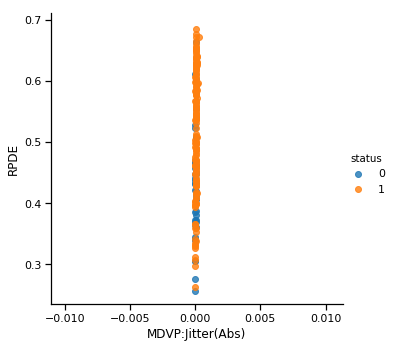

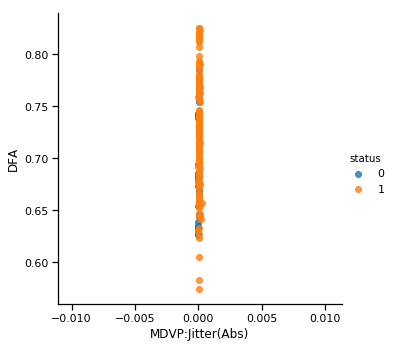

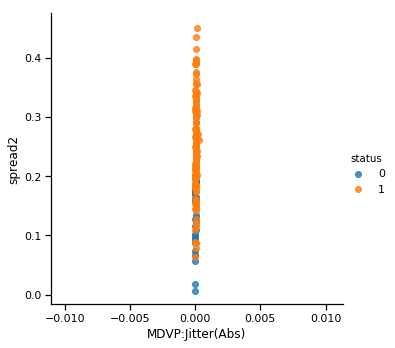

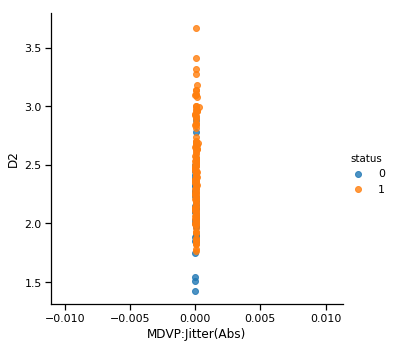

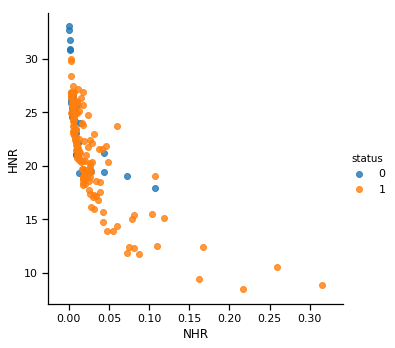

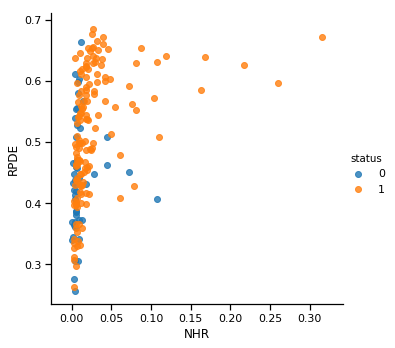

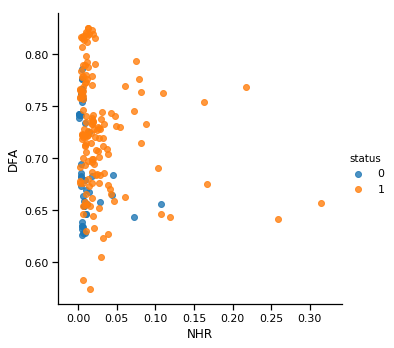

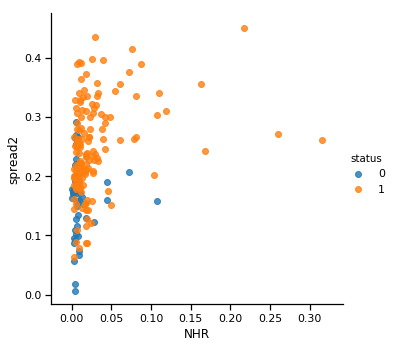

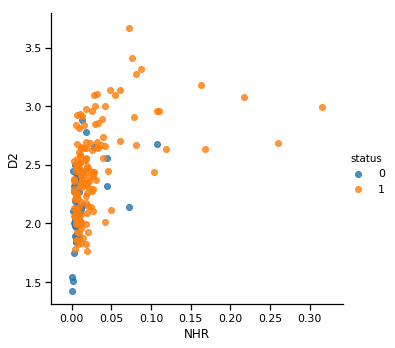

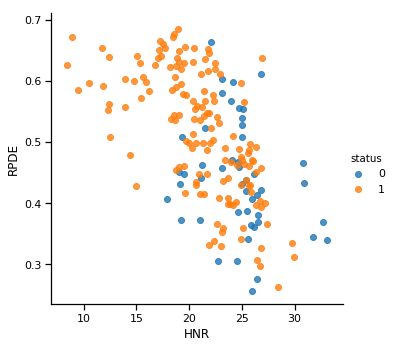

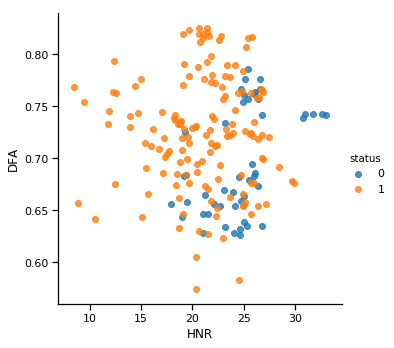

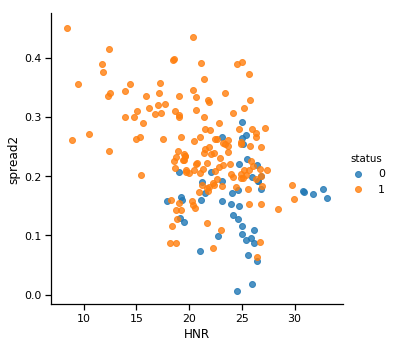

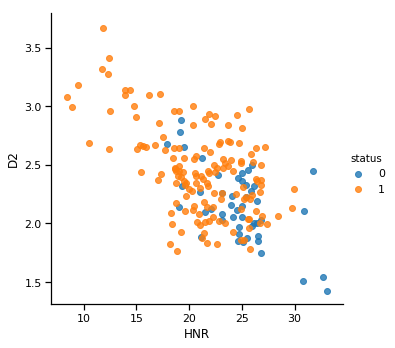

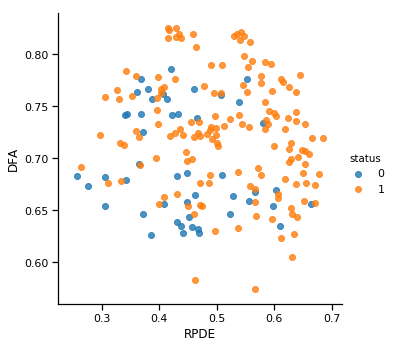

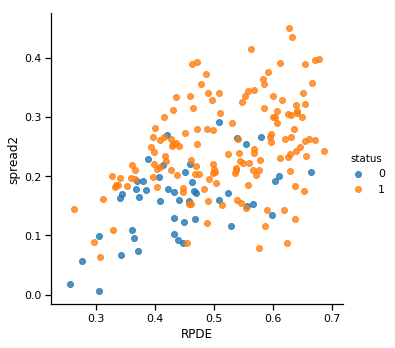

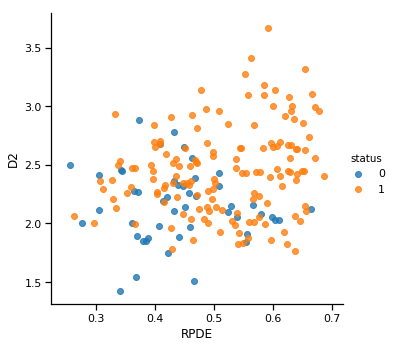

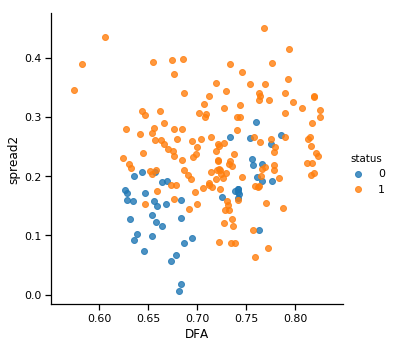

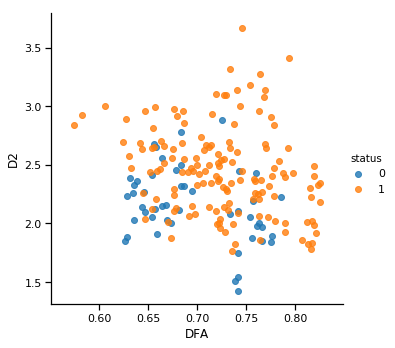

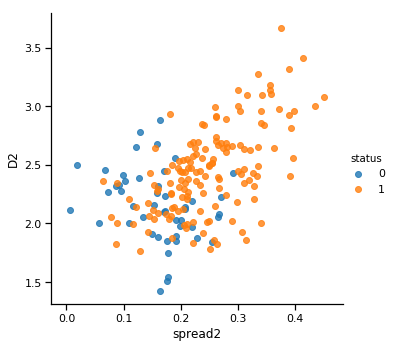

In [169]:
#Use pair plot with each column paired to get further understanding
cols = df.columns
i = 0
while i < len(cols):
    j = i + 1
    while j < len(cols):
        if((cols[i] != "status") & (cols[j] != "status")):
            sns.lmplot(cols[i], cols[j], df, hue="status", fit_reg=False)
        j = j + 1
    i = i + 1

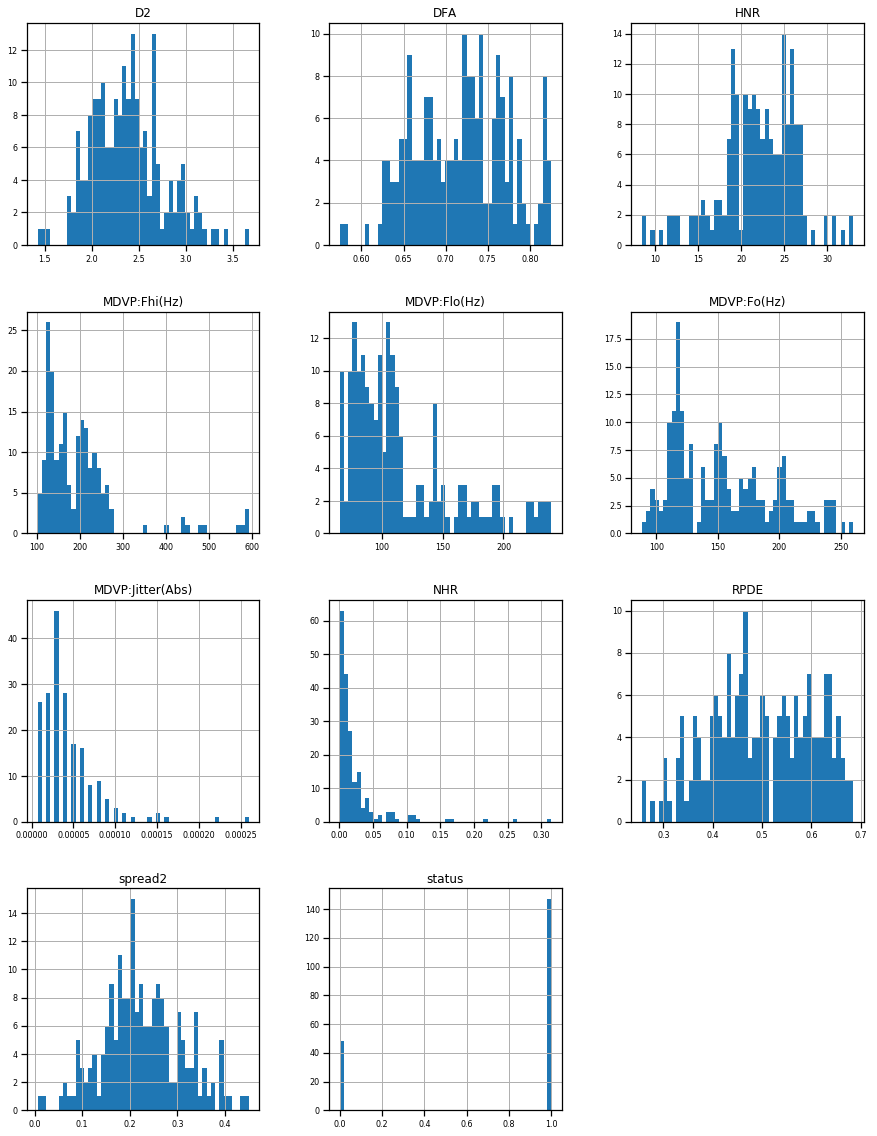

In [170]:
# Plot the distribution for each variable
df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

* MDVP:Fhi(Hz): Distribution is right-skewed as mean is greater than the median and there seems several outliers in the data 

* MDVP:PPQ, MDVP:RAP, MDVP:shimmer(dB) : Distribution is right-skewed and there seems several outliers in the data

* Spread1, Spread2 : Distribution seems uniform 

### Univariate & Bivariate Analysis

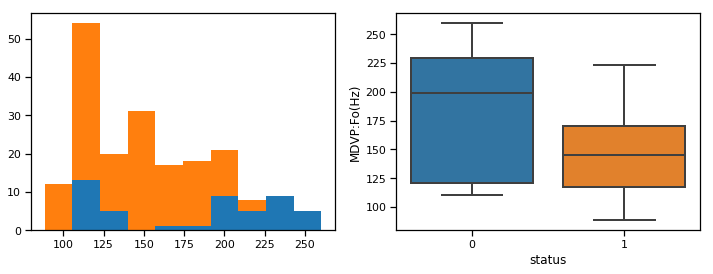

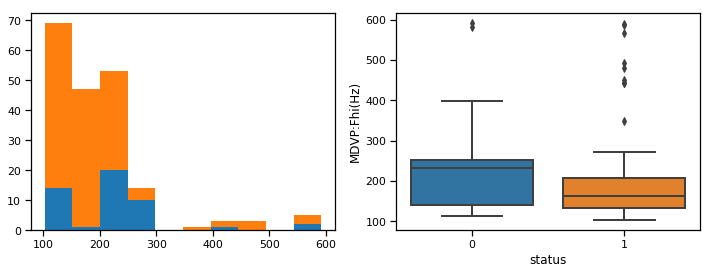

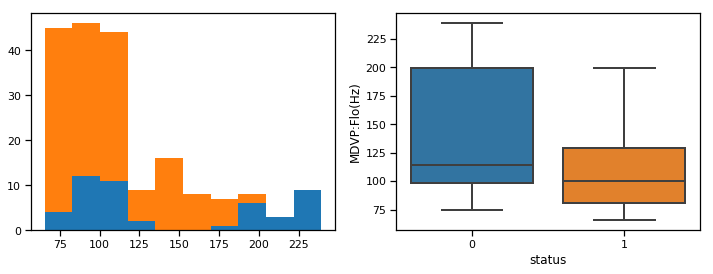

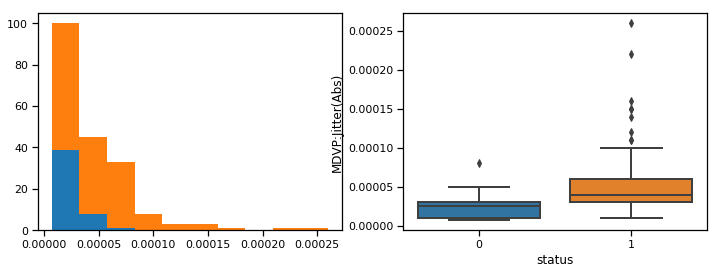

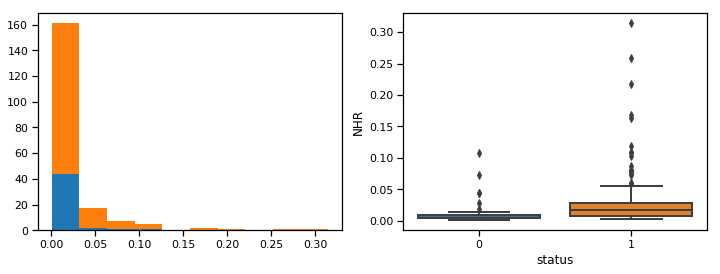

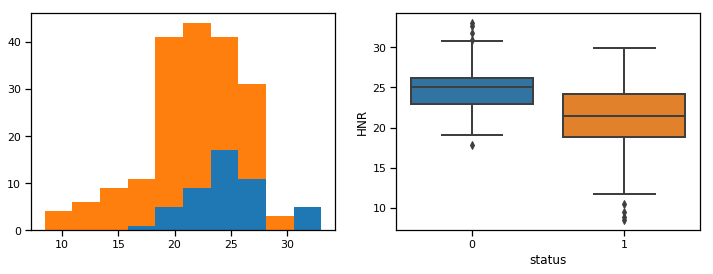

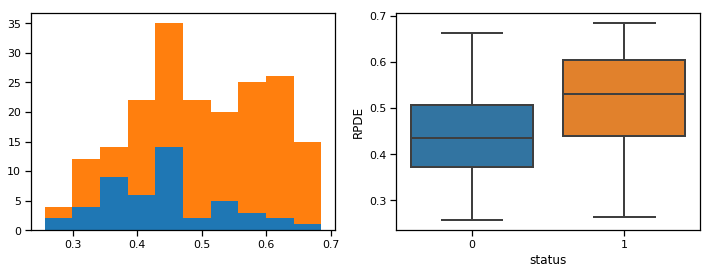

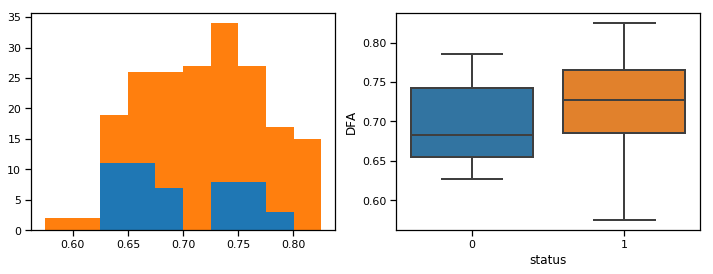

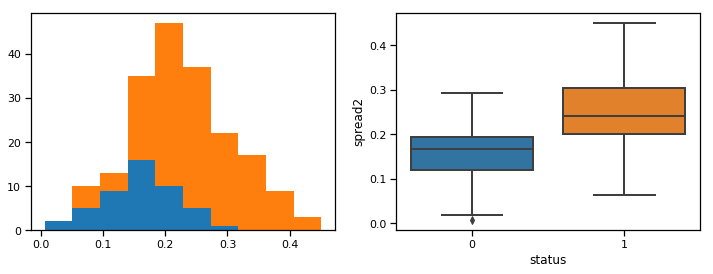

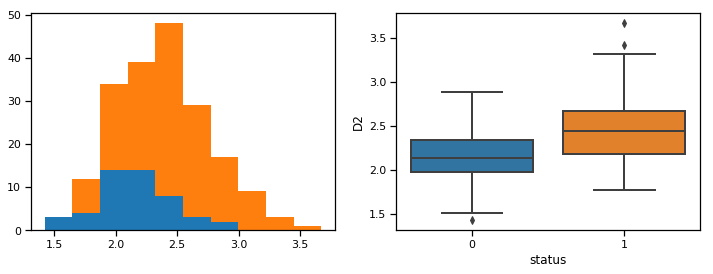

In [171]:
#perform univariate analysis
printHistAndBoxPlot(df, df.columns, "status")

* MDVP:Fo(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. There are no outliers in the data .
* MDVP:Fhi(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. Outliers are present in the data
* MDVP:Flo(Hz) varies a lot on the upper quartile group which is shown by the long whisker on the upper fence. Outliers are present in the data
* MDVP:Jitter(%) varies on the upper quartile group which is shown by the long whisker on the upper fence.Due to most of the datapoints are outliers the median is very low
* MDVP:Jitter(Abs) varies on the upper quartile group. Presence of outliers makes the distribution right-skewed
* MDVP:RAP varies on the upper quartile group especially for status=1 . Due to most of the datapoints are outliers the median is very low 
* NHR data variability/spread is very high and most of the datapoints are outliers . So the IQR is so narrow with median value close to the Q1 value


### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [0]:
# Split the data into training and test set in the ratio of 70:30 respectively

X=df.drop(['status'], axis=1)
y=df.status

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=1)

### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [174]:
print "Training Accuracy:\t",dtc.score(X_train, y_train)
print "Testing Accuracy:\t", dtc.score(X_test, y_test)

Training Accuracy:	1.0
Testing Accuracy:	0.7627118644067796


#### This looks like overfitt model

### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

### Model Regularization 

In [175]:
dtc2 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=2)
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [176]:
print "Training Accuracy:\t",dtc2.score(X_train, y_train)
print "Testing Accuracy:\t", dtc2.score(X_test, y_test)

Training Accuracy:	0.8823529411764706
Testing Accuracy:	0.7288135593220338


In [177]:
dtc3 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=5)
dtc3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [178]:
print "Training Accuracy:\t",dtc3.score(X_train, y_train)
print "Testing Accuracy:\t", dtc3.score(X_test, y_test)

Training Accuracy:	0.9191176470588235
Testing Accuracy:	0.7457627118644068


In [179]:
dtc4 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=10)
dtc4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
print "Training Accuracy:\t",dtc4.score(X_train, y_train)
print "Testing Accuracy:\t", dtc4.score(X_test, y_test)

Training Accuracy:	0.9779411764705882
Testing Accuracy:	0.7796610169491526


In [181]:
dtc5 = DecisionTreeClassifier(criterion='entropy',max_depth=5, max_leaf_nodes=15)
dtc5.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [182]:
print "Training Accuracy:\t",dtc.score(X_train, y_train)
print "Testing Accuracy:\t", dtc.score(X_test, y_test)

Training Accuracy:	1.0
Testing Accuracy:	0.7627118644067796


As you can see from the above models, model started moving toward overfitting from max_leaf node size 10 onwards, the ideal no of leaf nodes is between 5 to 10.

### Cross tab & Accuracy of the models 

In [0]:
y_pred = dtc4.predict(X_test)
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred)

In [184]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)

,Predicted Healthy,Predicted Parkinsons
True Healthy,9,10
True Parkinsons,3,37


### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

### Random forest classifier

In [0]:
# Use the classification algorithms and compare the models to find the best model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [186]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [187]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)

print "Training Accuracy:\t",random_forest.score(X_train, y_train)
print "Testing Accuracy:\t", random_forest.score(X_test, y_test)

Training Accuracy:	0.9926470588235294
Testing Accuracy:	0.847457627118644


In [188]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)

,Predicted Healthy,Predicted Parkinsons
True Healthy,11,8
True Parkinsons,1,39


As I am performing this exercise after learning Random Search CV, would be using RSCV

In [190]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={'n_estimators':np.arange(10, 100), 'max_depth':np.arange(5, 20)}
RS=RandomizedSearchCV(random_forest, param_grid,cv=3,scoring='f1_macro')
RS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([10, 11, ..., 98, 99]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1_macro', verbose=0)

In [191]:
RS.best_params_

{'max_depth': 13, 'n_estimators': 57}

In [194]:
rfcl = RandomForestClassifier(n_estimators=57, criterion='entropy',max_depth=13)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
y_predict = rfcl.predict(X_test)

print "Training Accuracy:\t",rfcl.score(X_train, y_train)
print "Testing Accuracy:\t", rfcl.score(X_test, y_test)

Training Accuracy:	1.0
Testing Accuracy:	0.847457627118644


In [196]:
rfcl.score(X_test, y_test)

0.847457627118644

In [198]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)

,Predicted Healthy,Predicted Parkinsons
True Healthy,10,9
True Parkinsons,0,40


## Thank you!